In [ ]:
import pandas as pd
import numpy as np


          0
match     0
2         8
3        69
4       145
5       195
6       214
7       223
8       243
9       455
10      493
11      526
12      561
13      720
14      791
15      830
16      834
17      945
18     1115
19     1223
20     1266
21     1401


In [ ]:
def list_info_with_nan(data):
    results = []
    for sublist in data:
        #total_length = len(sublist)  # Get the total length of the sublist
        non_nan_count = np.count_nonzero(~np.isnan(sublist))  # Count non-nan elements
        results.append(non_nan_count)
    return results


In [ ]:
summing_length=[]

In [ ]:
overall_performance=[]

In [ ]:
threshold=9

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_2_001.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)

In [ ]:
print(numbers.iloc[:, 0].tolist())

[8, 69, 145, 195, 214, 223, 243, 455, 493, 526, 561, 720, 791, 830, 834, 945, 1115, 1223, 1266, 1401]


In [ ]:
int_list=numbers.iloc[:, 0].tolist()

In [ ]:
string_list = list(map(str, int_list))

# Output the string list
print(string_list)

['8', '69', '145', '195', '214', '223', '243', '455', '493', '526', '561', '720', '791', '830', '834', '945', '1115', '1223', '1266', '1401']


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-001-kHz-continuousDLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]

# 输出结果
print(selected_data)

     scorer DLC_resnet50_more_keypointsMay29shuffle3_200000  \
10        8                               352.3538866043091   
71       69                               353.1790623664856   
147     145                              356.35675823688507   
197     195                               348.5560898780823   
216     214                               351.5659246444702   
225     223                               539.5711236000061   
245     243                               490.4213770031929   
457     455                              406.98962807655334   
495     493                               400.4159405529499   
528     526                                401.361736536026   
563     561                              378.61852049827576   
722     720                               568.5000734329224   
793     791                               393.8775690793991   
832     830                               384.9471366405487   
836     834                               529.126724958

In [ ]:
df_float = selected_data.apply(pd.to_numeric)

In [ ]:
import pandas as pd


# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)

# Output the filtered DataFrame
print(df_filtered)

      scorer  DLC_resnet50_more_keypointsMay29shuffle3_200000  \
10         8                                       352.353887   
71        69                                       353.179062   
147      145                                       356.356758   
197      195                                       348.556090   
216      214                                       351.565925   
225      223                                       539.571124   
245      243                                       490.421377   
457      455                                       406.989628   
495      493                                       400.415941   
528      526                                       401.361737   
563      561                                       378.618520   
722      720                                       568.500073   
793      791                                       393.877569   
832      830                                       384.947137   
836      834             

In [ ]:
out_df=df_filtered.iloc[:,1:]

In [ ]:
import math

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.

    Args:
        point1 (tuple): Tuple containing the x and y coordinates of the first point.
        point2 (tuple): Tuple containing the x and y coordinates of the second point.

    Returns:
        float: Euclidean distance between the two points.
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Example usage:
point_a = (1, 2)
point_b = (4, 6)
distance = euclidean_distance(point_a, point_b)
print("Euclidean distance between point A and point B:", distance)

Euclidean distance between point A and point B: 5.0


In [ ]:
# Example usage:
point_a = (734.5070190429688, 490.9391479492188	)
point_b = (736.9017994, 494.0877807)
distance = euclidean_distance(point_a, point_b)
print("Euclidean distance between point A and point B:", distance)

Euclidean distance between point A and point B: 3.955864148035729


In [ ]:
euclidean_distance((out_df.iloc[0,1],out_df.iloc[0,0]),(df_float_origin.iloc[0,1],df_float_origin.iloc[0,0]))

543.293866069405

In [ ]:
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(20):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)
result = list_info_with_nan(count_list)
summing_length=result
overall_performance=counts
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[0, 0, 0, 3, 5, 2, 5, 6, 7, 5, 0, 0, 0, 10, 11, 14, 17, 18, 16, 9, 20, 15]
[0.0, 0.0, 0.0, 15.0, 25.0, 10.0, 25.0, 31.57894736842105, 77.77777777777777, 71.42857142857143, 0, 0, 0, 100.0, 100.0, 87.5, 85.0, 90.0, 80.0, 45.0, 100.0, 75.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_2_002.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
print(numbers)

          0
match     0
2        74
3       195
4       234
5       320
6       385
7       474
8       589
9       695
10      701
11      720
12      876
13      918
14      971
15     1247
16     1406
17     1482
18     1508
19     1520
20     1553
21     1604


In [ ]:
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)

In [ ]:
int_list=numbers.iloc[:, 0].tolist()

In [ ]:
string_list = list(map(str, int_list))

# Output the string list
print(string_list)

['74', '195', '234', '320', '385', '474', '589', '695', '701', '720', '876', '918', '971', '1247', '1406', '1482', '1508', '1520', '1553', '1604']


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-002-kHz-continuousDLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]

# 输出结果
print(selected_data)

     scorer DLC_resnet50_more_keypointsMay29shuffle3_200000  \
76       74                               344.4883258342743   
197     195                               350.4907145500183   
236     234                               329.4735417366028   
322     320                               529.7824306488037   
387     385                               404.8980016708374   
476     474                                464.459677696228   
591     589                              400.15376377105713   
697     695                               685.3531551659107   
703     701                               462.3288779258728   
722     720                              383.20242977142334   
878     876                              394.70703423023224   
920     918                              366.79684686660767   
973     971                              459.71574330329895   
1249   1247                               527.3938899040222   
1408   1406                               367.502984523

In [ ]:
df_float = selected_data.apply(pd.to_numeric)

In [ ]:
# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)

# Output the filtered DataFrame
print(df_filtered)

      scorer  DLC_resnet50_more_keypointsMay29shuffle3_200000  \
76        74                                       344.488326   
197      195                                       350.490715   
236      234                                       329.473542   
322      320                                       529.782431   
387      385                                       404.898002   
476      474                                       464.459678   
591      589                                       400.153764   
697      695                                       685.353155   
703      701                                       462.328878   
722      720                                       383.202430   
878      876                                       394.707034   
920      918                                       366.796847   
973      971                                       459.715743   
1249    1247                                       527.393890   
1408    1406             

In [ ]:
out_df=df_filtered.iloc[:,1:]

In [ ]:
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(20):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)


[1, 1, 2, 4, 6, 4, 9, 10, 8, 12, 0, 0, 0, 9, 13, 16, 18, 19, 14, 15, 19, 14]
[5.0, 5.0, 10.0, 20.0, 30.0, 20.0, 45.0, 50.0, 88.88888888888889, 70.58823529411765, 0, 0, 0, 69.23076923076923, 81.25, 80.0, 90.0, 95.0, 70.0, 75.0, 95.0, 70.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_2_003.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-003-kHz-continuousDLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['5', '15', '80', '210', '252', '268', '283', '369', '474', '665', '695', '712', '773', '820', '1038', '1120', '1147', '1290', '1294', '1440']
[0, 1, 1, 2, 2, 2, 4, 6, 6, 5, 0, 0, 0, 10, 10, 12, 17, 15, 14, 9, 20, 15]
[0.0, 5.0, 5.0, 10.0, 10.0, 10.0, 20.0, 30.0, 37.5, 45.45454545454545, 0, 0, 0, 83.33333333333333, 83.33333333333333, 85.71428571428571, 85.0, 75.0, 70.0, 45.0, 100.0, 75.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_burst_1801.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-004-kHz-burst-18-1DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['14', '33', '47', '89', '107', '120', '142', '188', '278', '309', '356', '425', '531', '575', '596', '598', '752', '827', '838', '847']
[0, 0, 0, 1, 18, 1, 19, 2, 0, 0, 0, 0, 0, 17, 16, 14, 17, 18, 14, 19, 19, 17]
[0.0, 0.0, 0.0, 5.0, 90.0, 5.0, 95.0, 50.0, 0, 0, 0, 0, 0, 85.0, 80.0, 73.6842105263158, 85.0, 90.0, 70.0, 95.0, 95.0, 85.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_burst_1802.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-004-kHz-burst-18-2DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['10', '40', '55', '57', '68', '78', '184', '208', '550', '642', '892', '968', '980', '1005', '1017', '1073', '1083', '1117', '1136', '1260']
[2, 2, 1, 0, 10, 0, 12, 0, 0, 0, 0, 0, 0, 17, 17, 16, 18, 16, 11, 18, 18, 17]
[10.0, 10.0, 5.0, 0.0, 50.0, 0.0, 60.0, 0, 0, 0, 0, 0, 0, 94.44444444444444, 94.44444444444444, 88.88888888888889, 90.0, 80.0, 55.0, 90.0, 90.0, 85.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_burst_1803.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-004-kHz-burst-18-3DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['2', '53', '62', '100', '105', '155', '194', '302', '425', '442', '523', '663', '683', '835', '852', '931', '941', '1022', '1048', '1113']
[0, 1, 2, 1, 8, 3, 14, 0, 0, 0, 0, 0, 0, 20, 19, 18, 20, 20, 18, 20, 20, 18]
[0.0, 5.0, 10.0, 5.0, 40.0, 15.0, 70.0, 0, 0, 0, 0, 0, 0, 100.0, 95.0, 90.0, 100.0, 100.0, 90.0, 100.0, 100.0, 90.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_3601.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-004-kHz-burst-36-1DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['40', '109', '154', '309', '360', '489', '687', '732', '771', '869', '876', '922', '960', '1017', '1216', '1376', '1437', '1453', '1665', '1756']
Total NaNs in the DataFrame: 0
[2, 5, 6, 5, 8, 2, 7, 0, 0, 0, 0, 0, 0, 18, 18, 18, 19, 18, 16, 18, 18, 18]
[10.0, 25.0, 30.0, 25.0, 40.0, 10.0, 35.0, 0, 0, 0, 0, 0, 0, 90.0, 90.0, 90.0, 95.0, 90.0, 80.0, 90.0, 90.0, 90.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_3602.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-004-kHz-burst-36-2DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['19', '42', '61', '72', '93', '110', '134', '141', '178', '224', '235', '270', '285', '428', '471', '524', '566', '629', '643', '656']
Total NaNs in the DataFrame: 0
[0, 0, 0, 1, 9, 1, 15, 0, 0, 0, 0, 0, 0, 14, 14, 14, 17, 17, 9, 18, 18, 13]
[0.0, 0.0, 0.0, 5.0, 45.0, 5.0, 75.0, 0, 0, 0, 0, 0, 0, 77.77777777777777, 82.3529411764706, 87.5, 85.0, 85.0, 45.0, 90.0, 90.0, 65.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_continuous.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/2-and-2-kHz-continuousDLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['60', '79', '102', '307', '340', '445', '548', '599', '688', '848', '883', '1130', '1149', '1229', '1233', '1290', '1665', '1740', '1892', '1906']
Total NaNs in the DataFrame: 0
[0, 0, 0, 0, 0, 0, 2, 8, 11, 8, 0, 0, 0, 19, 18, 15, 20, 19, 12, 15, 19, 16]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 40.0, 61.111111111111114, 88.88888888888889, 0, 0, 0, 100.0, 94.73684210526316, 83.33333333333333, 100.0, 95.0, 60.0, 75.0, 95.0, 80.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_second_batch/CollectedData_bruce_new_channel.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/DLC_CLEANED_FILES/more_keypoints_200000_iteration_2nd_batch/New-channel-18-and-27-2-and-2-00DLC_resnet50_more_keypointsMay29shuffle3_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (22):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['11', '63', '81', '91', '182', '229', '255', '266', '310', '340', '361', '427', '477', '547', '563', '570', '615', '693', '716', '748']
Total NaNs in the DataFrame: 0
[0, 5, 8, 10, 12, 3, 17, 0, 0, 0, 0, 0, 0, 19, 19, 16, 19, 19, 20, 19, 20, 16]
[0.0, 25.0, 40.0, 50.0, 60.0, 15.0, 85.0, 0, 0, 0, 0, 0, 0, 100.0, 100.0, 84.21052631578948, 95.0, 95.0, 100.0, 95.0, 100.0, 80.0]


In [ ]:
final_percentage=[100*a / b if b != 0 else 0 for a, b in zip(overall_performance, summing_length)]

In [ ]:
final_percentage

[2.5,
 7.5,
 10.0,
 13.5,
 39.0,
 9.0,
 52.0,
 38.55421686746988,
 61.53846153846154,
 68.18181818181819,
 0,
 0,
 0,
 90.53254437869822,
 90.11627906976744,
 85.0,
 91.0,
 89.5,
 72.0,
 80.0,
 95.5,
 79.5]

In [ ]:
body_parts=['hip','thigh','knee','ankle','shin','heel','instep','toe_1_a','toe_1_b','toe_1_c','toe_2_a','toe_2_b','toe_2_c','toe_3_a','toe_3_b','toe_3_c','toe_4_a','toe_4_b','toe_4_c','toe_5_a','toe_5_b','toe_5_c']

In [ ]:

sentences = [
    f"Body part {part} has {percentage} percentage of chance for correct classification when threshold is {threshold} pixel"
    for part, percentage in zip(body_parts, final_percentage)
]

for sentence in sentences:
    print(sentence)


Body part hip has 2.5 percentage of chance for correct classification when threshold is 9 pixel
Body part thigh has 7.5 percentage of chance for correct classification when threshold is 9 pixel
Body part knee has 10.0 percentage of chance for correct classification when threshold is 9 pixel
Body part ankle has 13.5 percentage of chance for correct classification when threshold is 9 pixel
Body part shin has 39.0 percentage of chance for correct classification when threshold is 9 pixel
Body part heel has 9.0 percentage of chance for correct classification when threshold is 9 pixel
Body part instep has 52.0 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_1_a has 38.55421686746988 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_1_b has 61.53846153846154 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_1_c has 68.18181818181819 percentage of chance for correct classificatio

In [ ]:
my_dict={}

In [ ]:
my_dict[threshold]=final_percentage

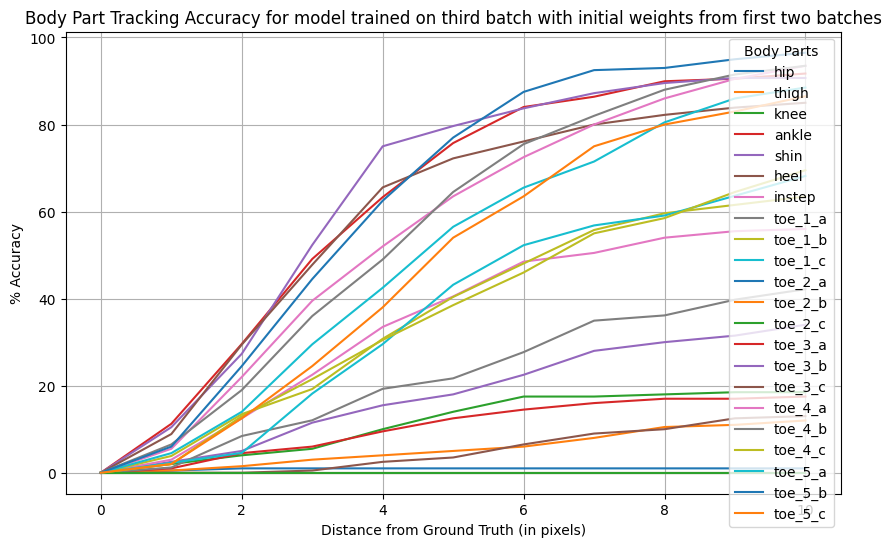

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary

# Prepare data for plotting
thresholds = sorted(my_dict.keys())
body_parts_data = {i: [] for i in range(22)}  # Create a dictionary to hold data for each body part

for threshold in thresholds:
    accuracies = my_dict[threshold]
    for index, accuracy in enumerate(accuracies):
        body_parts_data[index].append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
for part_index, accuracies in body_parts_data.items():
    plt.plot(thresholds, accuracies, label=f'{body_parts[part_index]}')

plt.xlabel('Distance from Ground Truth (in pixels)')
plt.ylabel('% Accuracy')
plt.title('Body Part Tracking Accuracy for model trained on third batch with initial weights from first two batches')
plt.legend(title="Body Parts", loc='upper right')
plt.grid(True)
plt.show()


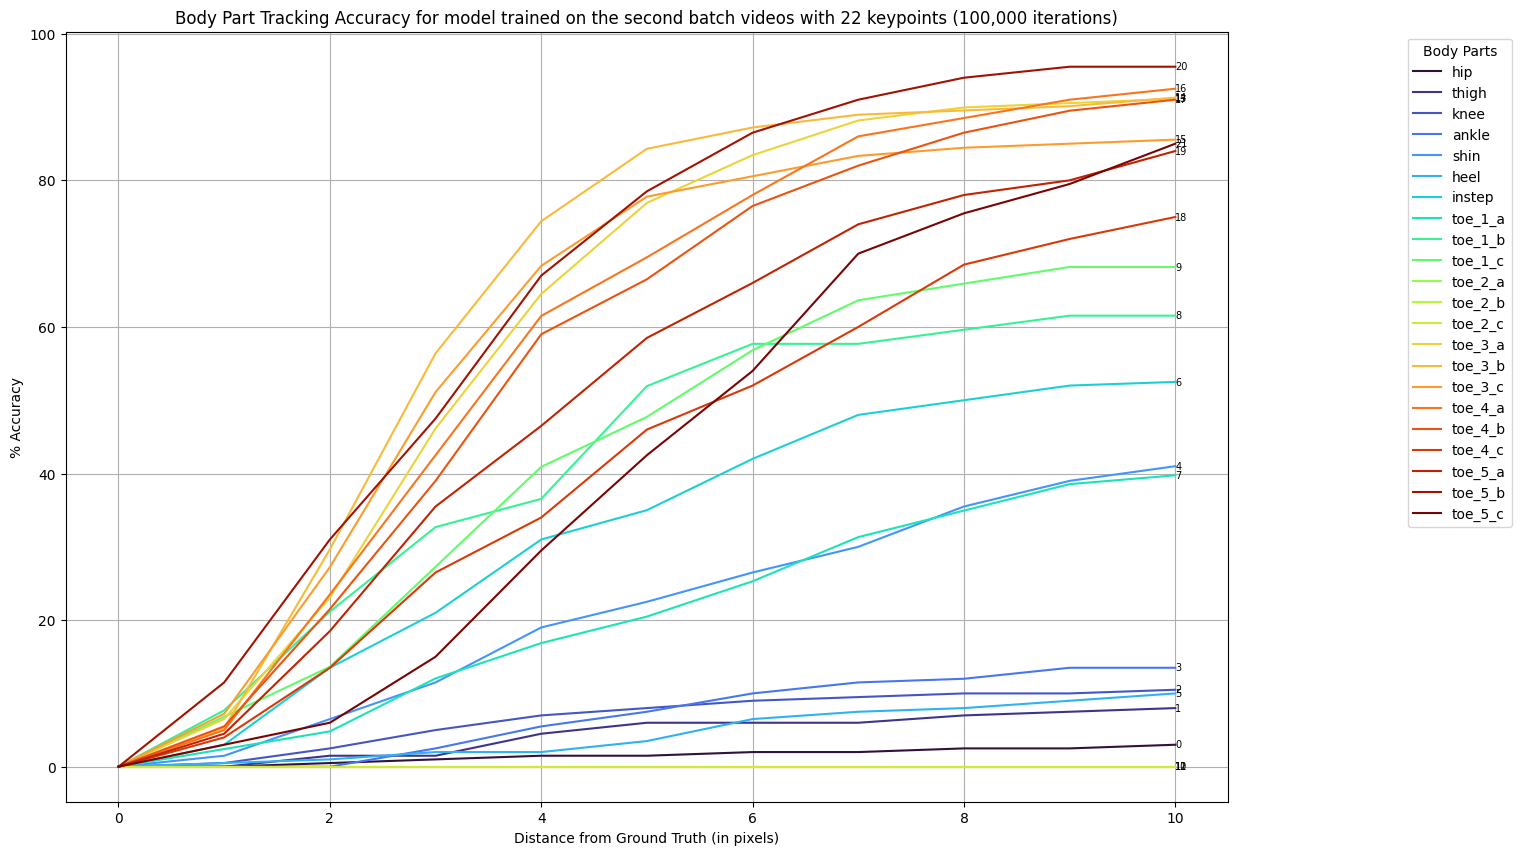

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import turbo
# Example dictionary

# Prepare data for plotting
thresholds = sorted(my_dict.keys())
body_parts_data = {i: [] for i in range(22)}  # Create a dictionary to hold data for each body part

for threshold in thresholds:
    accuracies = my_dict[threshold]
    for index, accuracy in enumerate(accuracies):
        body_parts_data[index].append(accuracy)

# Plotting
plt.figure(figsize=(15, 10))
colors = turbo(np.linspace(0, 1, len(body_parts_data)))
for part_index, accuracies in body_parts_data.items():
    plt.plot(thresholds, accuracies, color=colors[part_index],label=f'{body_parts[part_index]}')

    # Annotate the end point of each line with the line number
    plt.text(thresholds[-1], accuracies[-1], str(part_index),fontsize=7,verticalalignment='center')

plt.xlabel('Distance from Ground Truth (in pixels)')
plt.ylabel('% Accuracy')
plt.title('Body Part Tracking Accuracy for model trained on the second batch videos with 22 keypoints (100,000 iterations)')
plt.legend(title="Body Parts", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


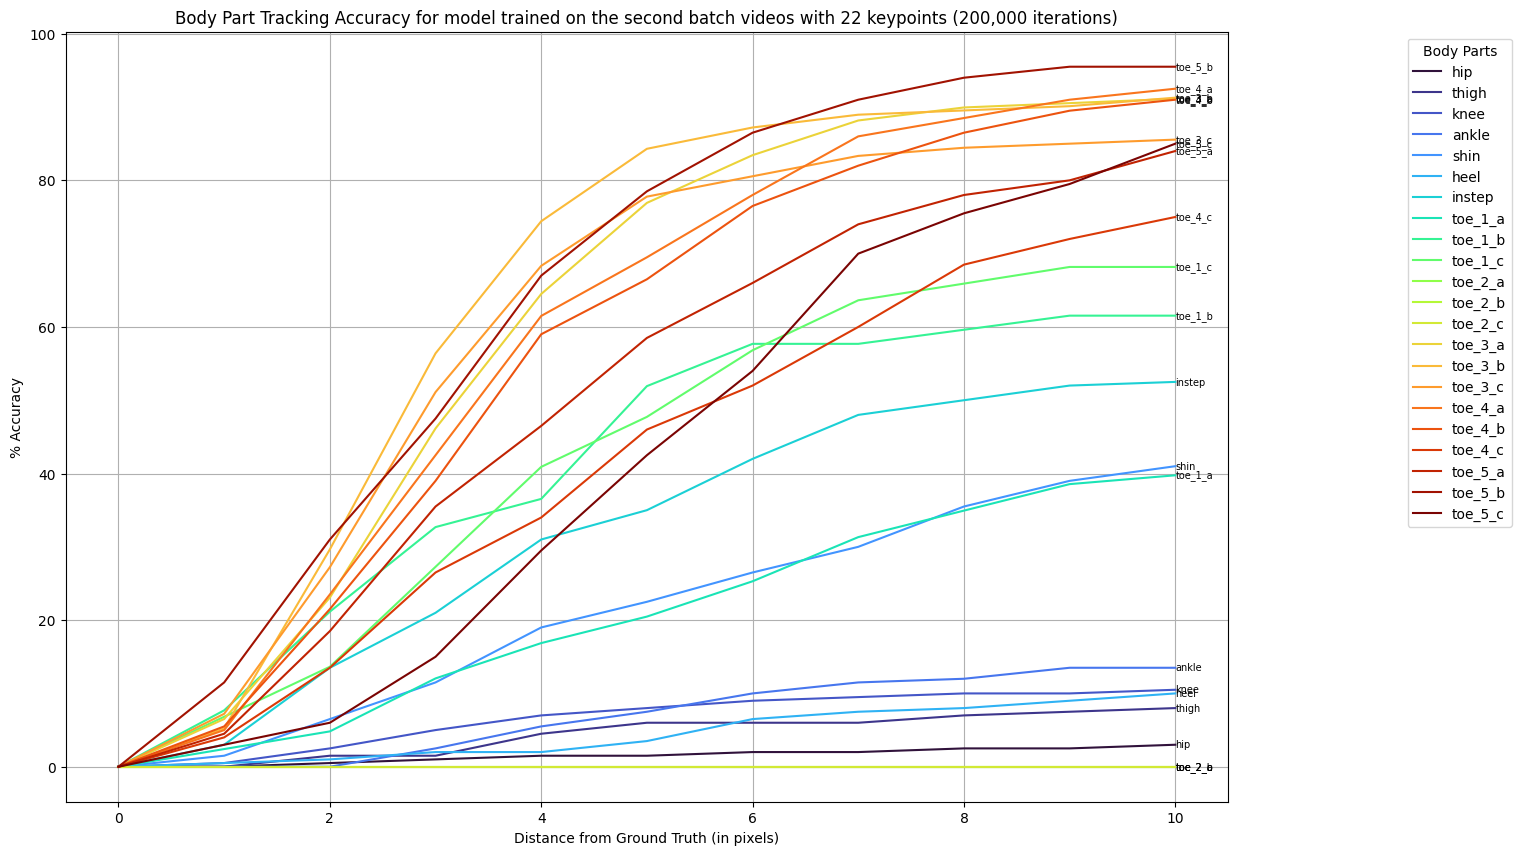

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import turbo
# Example dictionary

# Prepare data for plotting
thresholds = sorted(my_dict.keys())
body_parts_data = {i: [] for i in range(22)}  # Create a dictionary to hold data for each body part

for threshold in thresholds:
    accuracies = my_dict[threshold]
    for index, accuracy in enumerate(accuracies):
        body_parts_data[index].append(accuracy)

# Plotting
plt.figure(figsize=(15, 10))
colors = turbo(np.linspace(0, 1, len(body_parts_data)))
for part_index, accuracies in body_parts_data.items():
    plt.plot(thresholds, accuracies, color=colors[part_index],label=f'{body_parts[part_index]}')

    # Annotate the end point of each line with the line number
    plt.text(thresholds[-1], accuracies[-1],body_parts[part_index] ,fontsize=7,verticalalignment='center')

plt.xlabel('Distance from Ground Truth (in pixels)')
plt.ylabel('% Accuracy')
plt.title('Body Part Tracking Accuracy for model trained on the second batch videos with 22 keypoints (200,000 iterations)')
plt.legend(title="Body Parts", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()